In [3]:
# from configure_cloud_storag import GoogleCloudSync
# obj = GoogleCloudSync()
# obj.sync_gcp_to_folder()

In [4]:
!nvidia-smi # to check the gpu

Sat Jul 27 20:20:49 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   46C    P8     2W /  N/A |     98MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0



What is CUDA?
CUDA (Compute Unified Device Architecture) is a parallel computing platform and application programming interface (API) model created by NVIDIA. It allows developers to use NVIDIA GPUs for general-purpose computing (GPGPU), beyond just graphics rendering.




How CUDA and GPUs Work Together

CUDA Programming:

CUDA provides an environment and API for developers to write programs that execute on NVIDIA GPUs. Developers write code that specifies which tasks should be executed on the GPU, and CUDA handles the parallel execution of these tasks.
GPU Acceleration:

By offloading computation-intensive tasks to the GPU, CUDA can accelerate applications by leveraging the GPU's parallel processing capabilities.


In Summary:
CUDA is a platform and API that allows developers to utilize NVIDIA GPUs for parallel computing tasks.
GPU is a hardware component designed for high-speed parallel processing, originally for graphics but now widely used for general-purpose computing tasks.


In [ ]:
# if cuda is not available then install
'https://developer.nvidia.com/cuda-downloads'

In [21]:
!nvidia-smi

Sat Jul 27 20:59:38 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:02:00.0 Off |                  N/A |
| N/A   47C    P8              4W /   30W |      66MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# pip install tensorflow==2.17.0


Num GPUs Available:  0
TensorFlow version: 2.17.0


In [30]:
import tensorflow as tf

# List physical devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Physical GPUs available:", physical_devices)

# Check if GPU devices are available
if not physical_devices:
    print("No GPUs detected.")
else:
    # Print details about each GPU
    for device in physical_devices:
        print(f"Name: {device.name}, Type: {device.device_type}")


Physical GPUs available: []
No GPUs detected.


In [16]:
# unzip the data
import zipfile
destination_folder = r"D:\study\NLP-Hate-Speech-Classification-\data\dataset"
zipfile_path = r"D:\study\NLP-Hate-Speech-Classification-\data\dataset.zip"
# with zipfile.ZipFile(zipfile_path) as f:
#     text = f.extractall(destination_folder)


import shutil
shutil.unpack_archive(zipfile_path,destination_folder)


import os
# os.system(f'7z x "{zipfile_path}" -o"{destination_folder}"')

# import all required dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

imbalanced_data = pd.read_csv(r"D:\study\NLP-Hate-Speech-Classification-\data\dataset\imbalanced_data.csv")
imbalanced_data.head(2)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...


# Primary EDA

In [3]:
imbalanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


#### observation id is the constant feature we can drop it 

In [4]:
print("Duplicated", imbalanced_data.duplicated().sum())

Duplicated 0


In [5]:
print("Null record\n", imbalanced_data.isna().sum())

Null record
 id       0
label    0
tweet    0
dtype: int64


In [6]:
print("Data shape\n", imbalanced_data.shape
      )

Data shape
 (31962, 3)


# Check imbalance Data

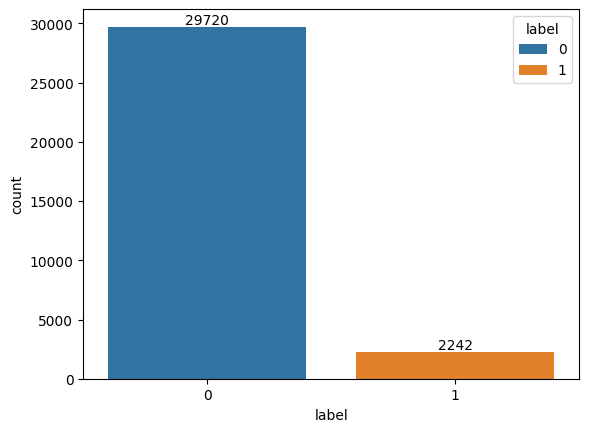

In [7]:
fig= sns.countplot(data=imbalanced_data,x= 'label',hue='label')
for container in fig.containers:
    fig.bar_label(container)

- data is imbalanced , 
- in class 0 has the 29720 count and 
- in class 1 has the only 2242 count
- to handle this imbalance data we have balanced data in another file we will use that dataset

In [8]:
#Drop the id column

imbalanced_data = imbalanced_data.drop('id',axis=1)

In [9]:
imbalanced_data.head(2)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...


In [10]:
# Read the another file of the data set
raw_data = pd.read_csv(r"D:\study\NLP-Hate-Speech-Classification-\data\dataset\raw_data.csv")
raw_data.sample(2)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
20038,20481,3,1,2,0,1,RT @socass_: &#8220;@00sexilexi00: @socass_ I ...
11534,11827,3,0,3,0,1,If anxiety was a person I'd kill that bitch so...


In [11]:
print("data shape\n",raw_data.shape)

data shape
 (24783, 7)


In [12]:
print("Check Null values\n",raw_data.isnull().sum())

Check Null values
 Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [13]:
# drop the columns which not required for us
raw_data = raw_data[['class','tweet']]
raw_data.head(2)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [14]:
# check the unique values in data
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

- __observation :__
> here class 2,1,0 as per the data defination
> class 0 :hate

> class 1 :abusive

> class 2 :no hate

note in imabalance data hate=1 and no hate =0

so we can mask the two class here as one class
class 0 and class 1 can be the class hate 



In [15]:
# convert the class  0 and 1 into the common class
raw_data['class'].replace({0:4,1:4},inplace=True)

In [16]:
raw_data['class'].unique()

array([2, 4], dtype=int64)

In [17]:
now replace the class 2----> 0 No hate
                class 4----> 1 hate

SyntaxError: invalid syntax (2287405410.py, line 1)

<Axes: xlabel='class', ylabel='count'>

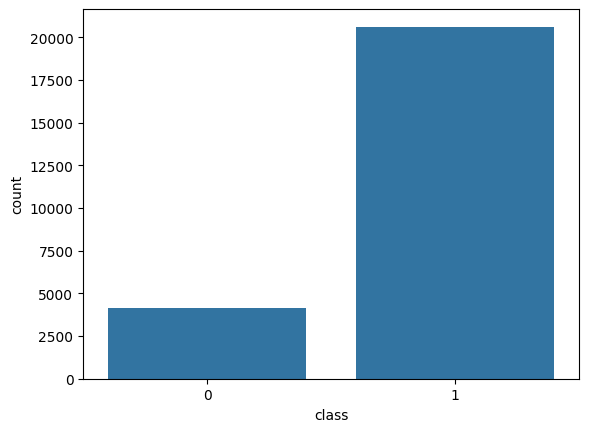

In [17]:
raw_data['class'].replace({2:0,4:1},inplace=True)

sns.countplot(raw_data,x='class')

In [18]:

raw_data.rename(columns={'class':'label'},inplace=True)
raw_data

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [30]:
# concatenate the two data frame 
df  = pd.concat([raw_data,imbalanced_data])
df

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


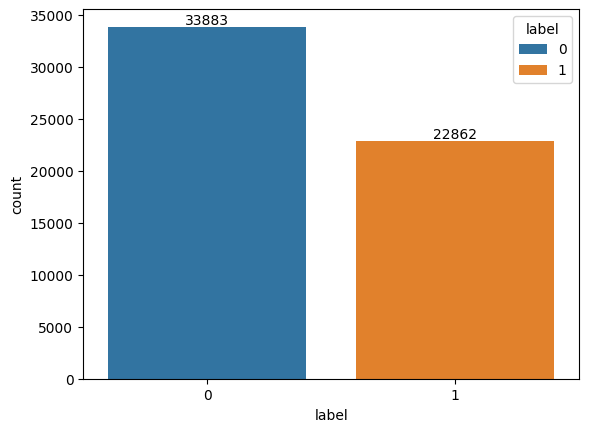

In [31]:
fig =  sns.countplot(data=df,x='label',hue='label')
for container in fig.containers:
    fig.bar_label(container)

# Text Preprocessing

In [32]:
import re
import nltk 
import string
from nltk.corpus import stopwords
nltk.download("stopwords")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BW_ML_1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# apply the stemming and stop 
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))
print(stopword)
print(len(stopword))

{'why', 'weren', 'only', 'because', 'doesn', 'myself', 'wasn', 'its', 'were', 'until', 'won', "wouldn't", 'there', 'me', "you'd", 'it', 're', "hadn't", 'few', "mustn't", 'between', 'not', "aren't", "haven't", 'or', 'very', 'himself', 'we', 'before', 'she', 'these', 'having', 'needn', "weren't", 'have', 'at', 'don', 'too', 'him', "hasn't", 'below', 'what', 'nor', "wasn't", 'does', 'was', 'own', 'm', 'ain', 'down', 'further', 'any', 'you', 'that', 'can', 'for', 'some', 'once', 'i', 'shan', 'doing', 'themselves', 'no', 'an', 'her', "you'll", 'other', 'herself', 'by', "she's", "doesn't", 'couldn', 'hers', 'shouldn', 'both', 'been', 'most', "you've", 'd', 'as', 'our', 'their', 'than', "don't", 'wouldn', 'of', 'they', 's', 'over', 'didn', "didn't", 'theirs', 'will', 'on', 'now', 'aren', 'had', 'while', 'above', 'whom', 'be', 'has', 'yours', 'where', 'so', "needn't", 'here', "shan't", 'each', 'a', "that'll", 'my', 'about', 'haven', 'y', 'he', 'his', 'is', 'being', 'just', 'during', 'mustn', '

In [34]:
# # for index,row in df.iterrows():
#     print(row)

# Remove the HTML tag and special chara

In [24]:
def get_remove_tag(text):
    text = re.sub(r'<.*?>', '', text)    # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text

In [25]:
def data_cleaning(words):

    # step 1 convert the your sentence or word in lower case
    words = str(words).lower() 

    # clean the data 
    words = re.sub('\[.*?\]','',words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)
    return words




In [36]:
df['tweet'] = df['tweet'].apply(data_cleaning)

In [38]:
x = df['tweet']
y = df['label']


In [39]:
from sklearn.model_selection import train_test_split
     

# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


# Feature Engineering

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


In [41]:

max_words = 50000
max_len = 300

In [42]:

max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)


In [43]:

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)


In [44]:
sequences_matrix

array([[    0,     0,     0, ...,   112,    23, 38414],
       [    0,     0,     0, ...,  6280, 20408,  1086],
       [    0,     0,     0, ...,    14,    72,   701],
       ...,
       [    0,     0,     0, ...,  1315,  3027, 16270],
       [   17,   631,     9, ...,  1533,     4,   343],
       [   15,   121,   116, ...,     2,    17,  5035]])

In [45]:

from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
     

# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [47]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)


266/266 [==============================] - 521s 2s/step - loss: 0.2597 - accuracy: 0.9013 - val_loss: 0.1705 - val_accuracy: 0.9373


In [48]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,y_test)


444/444 [==============================] - 25s 56ms/step - loss: 0.1750 - accuracy: 0.9344


In [49]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 [==============================] - 25s 56ms/step


In [50]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)


In [52]:
from sklearn.metrics import confusion_matrix
     

print(confusion_matrix(y_test,res))
     

import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
     

# Let's save the mdoel.
model.save("model.h5")


[[8171  312]
 [ 619 5085]]


In [53]:
import keras
     

load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)


In [54]:
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


text = "!!!!! RT @mleew17: boy dats cold...tyga dwn ba"
test=[clean_text(x_test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)


19417    just saying they would have let a guy fall to ...
21556     user funny shoot in the office today stay tun...
24386    user waooooow my hea is huing right now i mean...
29347     user user yes except now its happening on bot...
18801    rt cpabry curious george the curious little mo...
                               ...                        
5126       na wet porn sexy hot young nude horny naught...
16426    amazing show guys user   xx amazing show guys ...
14040    best essential oils for healing    altwaystohe...
12104    juniors are still pussi juniors are still puss...
28731    i feel ashamed for the user are they being pai...
Name: tweet, Length: 14187, dtype: object
    just saying they would have let a guy fall to      user funny shoot in the office today stay     user waooooow my hea is huing right now i      user user yes except now its happening on     rt cpabry curious george the curious little mo                                                              na wet 

In [55]:
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

    

pred [[0.13526472]]
no hate
